# Power-law rotation curve

In [1]:
import numpy as np

In [2]:
#Matplotlib configuration
from matplotlib import pyplot as plt

#A4 tufte layout paper figure sizes
MARGIN_FIG = lambda scale: (1.99, 1.99*scale)
MAIN_FIG = lambda scale: (4.18, 4.18*scale)
FULL_FIG = lambda scale: (6.64, 6.64*scale)

#Fontsize configuration
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', family='Fira Code')
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


#Other matplotlib configuration
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.autolayout'] = True
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["savefig.bbox"] = 'tight'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Fira Code'
plt.rcParams['mathtext.it'] = 'Fira Code'
plt.ioff()

In [3]:
#position of the sun
R0 = 8.34
T0 = 240

#line of sight
l = 125 * np.pi / 180
b = 0

#rot curve parameters
a1 = 1.022
a2 = 0.0803

def rot_curve(R):
  return T0 * a1 * (R/R0)**a2
def inv_rot_curve(T):
  return R0 * (T / (T0 * a1))**(1/a2)
def v(T, R):
  return np.sin(l)*np.cos(b)*((R0*T/R) - T0)
def T(v,R):
  return (R/R0) * (v/(np.sin(l)*np.cos(b)) + T0)
def rot_v(R):
  return v(rot_curve(R), R)
def inv_rot_v(v):
  return R0 * (v / (a1*T0*np.sin(l)*np.cos(b)) + 1/a1)**(a2-1)

In [4]:
#locations of the three spiral arms
V_LOCAL = -6.22233903e+00
V_OUTER = -5.20972297e+01

SIG_LOCAL = 6.89883893e+00
SIG_OUTER = 1.12561854e+01

R_LOCAL = R0
R_OUTER = 14.5

T_LOCAL = T(V_LOCAL, R_LOCAL)
T_OUTER = T(V_OUTER, R_OUTER)

print(T_OUTER)

N_CHANNELS = 272
V_STEP = -0.82446
V_REF = -60

#snelheid is TOV zon
v = np.linspace(0, V_STEP*N_CHANNELS, num=N_CHANNELS)
v = v - (v[145] - V_REF)

306.6924310122165


findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive


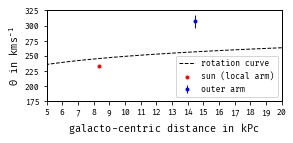

rot. curve velocity outer=256.4190897807043


In [5]:
R = R0*np.linspace(0, 3, 100)

plt.figure(figsize=MAIN_FIG(0.5))
plt.plot(R, rot_curve(R), label="rotation curve", linestyle='--', color='black')

plt.scatter(R_LOCAL, T_LOCAL,
            label="sun (local arm)",
            color='r',
            marker='.',
            zorder=15)
plt.errorbar(R_OUTER, T_OUTER,
            yerr=SIG_OUTER,
            fmt='.',
            label="outer arm",
            color='b',
            zorder=15)

plt.legend(loc='lower right')
plt.xlabel("galacto-centric distance in $kPc$")
plt.ylabel("$\Theta$ in $kms^{-1}$")

plt.xlim(5, 20)
plt.ylim(175, 325)
plt.yticks([175,200,225,250,275,300,325])
plt.xticks(np.arange(5,21))

plt.savefig('../figs/rot_curve_with_geom_2.pdf', transparent=True, bbox_inches="tight", pad_inches=0.05)
plt.show()

print(f"rot. curve velocity outer={rot_curve(R_OUTER)}")

In [6]:
#aight calculate distances
R = inv_rot_v(v)
cosl = np.cos(l)
d = cosl*R0 + np.sqrt(R**2 -(1-cosl**2)*R0**2)
#set NaN channels to zero distance :3
d[np.isnan(d)] = 0.0

/tmp/ipykernel_13950/2175633666.py:4: RuntimeWarning: invalid value encountered in sqrt
  d = cosl*R0 + np.sqrt(R**2 -(1-cosl**2)*R0**2)


/tmp/ipykernel_13950/2218739.py:15: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(*vr_outer, color='red', alpha=0.2, edgecolor=0.0)
/tmp/ipykernel_13950/2218739.py:16: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(*vr_local, color='blue', alpha=0.2, edgecolor=0.0)


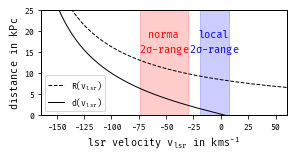

59.98783173431734 -164.26528826568267


In [7]:
SLICE_OUTER = np.ma.masked_where(
  (v >= V_OUTER - 2*SIG_OUTER) & (v <= V_OUTER + 2*SIG_OUTER), v
).mask.astype(bool)
SLICE_LOCAL = np.ma.masked_where(
  (v >= V_LOCAL - 2*SIG_LOCAL) & (v <= V_LOCAL + 2*SIG_LOCAL), v
).mask.astype(bool)

plt.figure(figsize=MAIN_FIG(0.55))
plt.plot(v, R, linestyle='--', color='black', zorder=15, label='$R(v_{lsr})$')
plt.plot(v, d, linestyle='-', color='black', zorder=15, label='$d(v_{lsr})$')

vr_outer = [v[SLICE_OUTER][0], v[SLICE_OUTER][-1]]
vr_local = [v[SLICE_LOCAL][0], v[SLICE_LOCAL][-1]]

plt.axvspan(*vr_outer, color='red', alpha=0.2, edgecolor=0.0)
plt.axvspan(*vr_local, color='blue', alpha=0.2, edgecolor=0.0)

#add text for spiral arm spans
plt.text(V_LOCAL, 15, 'local\n$2\sigma$-range', color='b', horizontalalignment='center')
plt.text(V_OUTER, 15, 'norma\n$2\sigma$-range', color='r', horizontalalignment='center')

#shared between axes
plt.ylabel("distance in $kPc$")
plt.xlabel("lsr velocity $v_{lsr}$ in $kms^{-1}$")
plt.ylim(0,25)
plt.xlim(np.min(v), np.max(v))

plt.legend(loc='lower left')
plt.savefig('../figs/rot_curve_with_arms_2.pdf')
plt.show()

print(np.max(v), np.min(v))

In [8]:
#last step is to save the velocity channels
np.savetxt("../tmp/distance_channels_2.csv", R, delimiter=',')
np.savetxt("../tmp/sun_distance_channels_2.csv", d, delimiter=',')

#and where each spiral arm starts/stops
np.savetxt("../tmp/SLICE_LOCAL.csv", SLICE_LOCAL, delimiter=',')
np.savetxt("../tmp/SLICE_OUTER.csv", SLICE_OUTER, delimiter=',')

In [9]:
print(R[SLICE_LOCAL])
print(d[SLICE_OUTER])

[8.23814294 8.26905393 8.300208   8.33160807 8.36325712 8.39515815
 8.42731423 8.45972848 8.49240406 8.52534419 8.55855213 8.59203122
 8.62578484 8.65981643 8.69412948 8.72872754 8.76361424 8.79879325
 8.83426832 8.87004325 8.9061219  8.94250823 8.97920624 9.01622001
 9.05355369 9.0912115  9.12919774 9.1675168  9.20617311 9.24517123
 9.28451577 9.32421142 9.36426299]
[2.40854383 2.47129418 2.5343918  2.59784483 2.66166151 2.72585016
 2.79041921 2.85537717 2.92073269 2.9864945  3.05267146 3.11927257
 3.18630692 3.25378376 3.32171246 3.39010255 3.4589637  3.52830572
 3.5981386  3.66847249 3.73931769 3.8106847  3.88258421 3.95502706
 4.02802433 4.10158727 4.17572736 4.25045629 4.32578597 4.40172854
 4.4782964  4.55550215 4.6333587  4.71187919 4.79107703 4.87096593
 4.95155989 5.03287318 5.11492041 5.19771651 5.28127672 5.36561663
 5.45075219 5.53669971 5.62347588 5.71109776 5.79958285 5.88894902
 5.97921461 6.07039838 6.16251955 6.25559784 6.34965342 6.444707  ]
